In [2]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from shapely.geometry import Point
import adjustText as aT
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Twitter
dir_ = "../../data/database/output_ml/M1/NER_extractor/"
file = 'accident_tweets_lat_lon_geocord_bogota_unique_keywords.tsv'
tweets = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
tweets = tweets[tweets['user_name'] != 'BogotaTransito']


# Oficial data
dir_2 = "../../data/database/"
file2 = 'historico_oficial_accidentes_bogota.tsv'

oficial = pd.read_csv(dir_2+file2, delimiter = "\t", quoting = 3)


localidades = gpd.read_file('maps/shp2/loca-urb.shp')

localidades['center'] = localidades['geometry'].centroid
loc_points = localidades.copy()
loc_points.set_geometry('center',inplace = True)

In [6]:
points = tweets.apply(
    lambda srs: Point(float(srs['lon']), float(srs['lat'])),
    axis='columns'
)
gpd_tweets = gpd.GeoDataFrame(tweets, geometry=points)

In [7]:
points = oficial.apply(
    lambda srs: Point(float(srs['lon']), float(srs['lat'])),
    axis='columns'
)
gpd_oficial= gpd.GeoDataFrame(oficial, geometry=points)

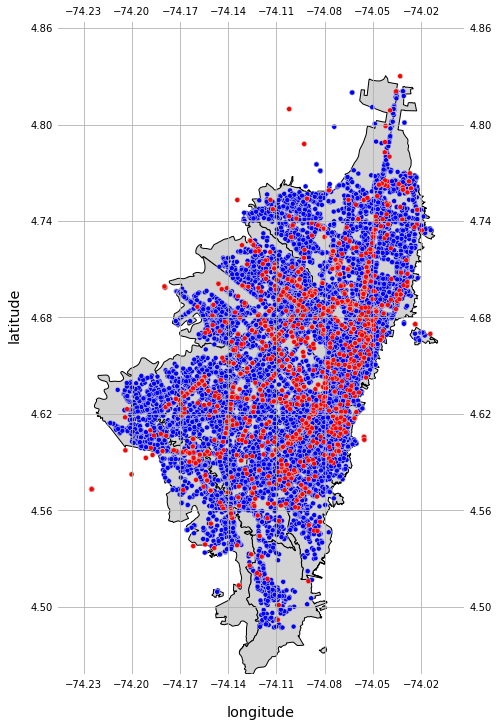

In [18]:
ax = gplt.polyplot(localidades,projection=gcrs.PlateCarree(),facecolor='lightgray', figsize=(12,12))
gplt.pointplot(gpd_oficial, edgecolor='lightgray', color='blue', linewidth=0.5, alpha=1, ax=ax)
gplt.pointplot(gpd_tweets, edgecolor='lightgray', color='red', linewidth=0.5, alpha=1, ax=ax)

title = None
subtitle = None

ax.gridlines(draw_labels=True)
ax.set_xlabel('lon')
ax.set_ylabel('lat');
#### X axis
ax.text(-0.09, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',fontsize='x-large',
        transform=ax.transAxes)
#### Y axis
ax.text(0.5, -0.07,'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',fontsize='x-large',
        transform=ax.transAxes)
#### Title
if title != None:
    ax.text(0.5, 1.1, title, va='top', ha='center',
            rotation='horizontal', rotation_mode='anchor', fontsize='xx-large',
            transform=ax.transAxes)
#### Subtitle
if subtitle != None:
    ax.text(0.5, 1.06, subtitle, va='top', ha='center',
            rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
            transform=ax.transAxes)
fig = ax.get_figure()
#fig.savefig(export_name)